# Baseline Models

In [ ]:
import sys
import os

# Get parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add parent directory to sys.path
sys.path.append(parent_dir)

In [1]:

from loaders import ItemLoader
from config import DATASET_FOLDER, SEED, OPENAI_API_KEY, ANTHROPIC_API_KEY
from utils import Utils
from testing import Tester
import re
import joblib

# Traditional ML libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# imports for NLP related ML
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords 

# more advanced ML model
from models.tfidf_rf_regressor import RFRegressor

import openai
import anthropic

# automatically reload changed modules
%load_ext autoreload
%autoreload 2

In [2]:
utils = Utils()

In [2]:
# load train and test sets
loader = ItemLoader()
train, test = loader.load_pickle(folder_name=DATASET_FOLDER)

In [3]:
rf = RFRegressor(train, test)

In [4]:
# key words list for each car description (unigram - trigram)
key_words = rf.get_key_words()
print(len(key_words))
key_words[0]

1420


['0l',
 '0l v8',
 '10',
 '10 speed',
 '15',
 '17',
 '17 inch',
 '1970',
 '1970 ford',
 '1970 ford bronco',
 '285',
 '33',
 '44',
 '44 axle',
 '44 axle ford',
 '4x4',
 'accessories',
 'adventure',
 'aesthetics',
 'aesthetics modern',
 'air',
 'aluminum',
 'american',
 'american muscle',
 'appeal',
 'assisted',
 'audio',
 'authentic',
 'automatic',
 'automatic overdrive',
 'automatic overdrive transmission',
 'available',
 'available sale',
 'axle',
 'axle ford',
 'axle ford rear',
 'axles',
 'beach',
 'best',
 'bikini',
 'bilstein',
 'blend',
 'blend style',
 'blending',
 'blends',
 'bluetooth',
 'body',
 'brakes',
 'brakes bring',
 'braking',
 'bring',
 'bronco',
 'bronco 4x4',
 'bronco vintage',
 'built',
 'bumpers',
 'cage',
 'captures',
 'captures essence',
 'car',
 'charm',
 'chassis',
 'chrome',
 'chrome mirrors',
 'city',
 'city streets',
 'classic',
 'classic car',
 'classic design',
 'coated',
 'color',
 'color custom',
 'color scheme',
 'column',
 'comfort',
 'complemented',
 

In [5]:
X_train, X_test, y_train, y_test = rf.get_features_and_targets()

In [6]:
X_train.shape

(1420, 17710)

In [7]:
model = rf.fit_model(X_train, y_train)

In [14]:
# Save the vectorizer to a file

joblib.dump(rf.vectorizer, 'models/tfidf_vectorizer.pkl')

['models/tfidf_vectorizer.pkl']

In [8]:
# Save the model to a file

joblib.dump(model, 'models/random_forest_tfidf_model.pkl')

['models/random_forest_tfidf_model.pkl']

In [7]:
# Load model back in again

model = joblib.load('models/random_forest_tfidf_model.pkl')

In [15]:
# Load vectorizer back in again
vectorizer = joblib.load('models/tfidf_vectorizer.pkl')

In [8]:
print(X_test.shape)
print(len(rf.test))

(339, 17710)
339


In [9]:
rf.add_vector(X_test)

In [10]:
def random_forest_pricer(item):
    doc_vector = item.vector
    return max(0, model.predict([doc_vector])[0])

1: Guess: $66,475.19 Truth: $102,995.00 Error: $36,519.81 SLE: 0.19 Item: 1969 Chevrolet Camaro
2: Guess: $56,720.19 Truth: $39,995.00 Error: $16,725.19 SLE: 0.12 Item: 1967 Chevrolet Camaro
3: Guess: $67,327.26 Truth: $12,950.00 Error: $54,377.26 SLE: 2.72 Item: 1968 Chevrolet Camaro
4: Guess: $101,444.86 Truth: $115,000.00 Error: $13,555.14 SLE: 0.02 Item: 1968 Chevrolet Camaro SS
5: Guess: $113,244.27 Truth: $125,000.00 Error: $11,755.73 SLE: 0.01 Item: 1967 Ford Mustang
6: Guess: $50,166.76 Truth: $65,000.00 Error: $14,833.24 SLE: 0.07 Item: 1966 Ford Mustang
7: Guess: $89,061.12 Truth: $57,995.00 Error: $31,066.12 SLE: 0.18 Item: 1967 Chevrolet Camaro
8: Guess: $81,721.07 Truth: $49,500.00 Error: $32,221.07 SLE: 0.25 Item: 1975 Ford Bronco
9: Guess: $70,309.74 Truth: $64,900.00 Error: $5,409.74 SLE: 0.01 Item: 1968 Chevrolet Camaro
10: Guess: $51,891.81 Truth: $36,000.00 Error: $15,891.81 SLE: 0.13 Item: 1967 Ford Bronco
11: Guess: $68,082.56 Truth: $44,950.00 Error: $23,132.56 SL

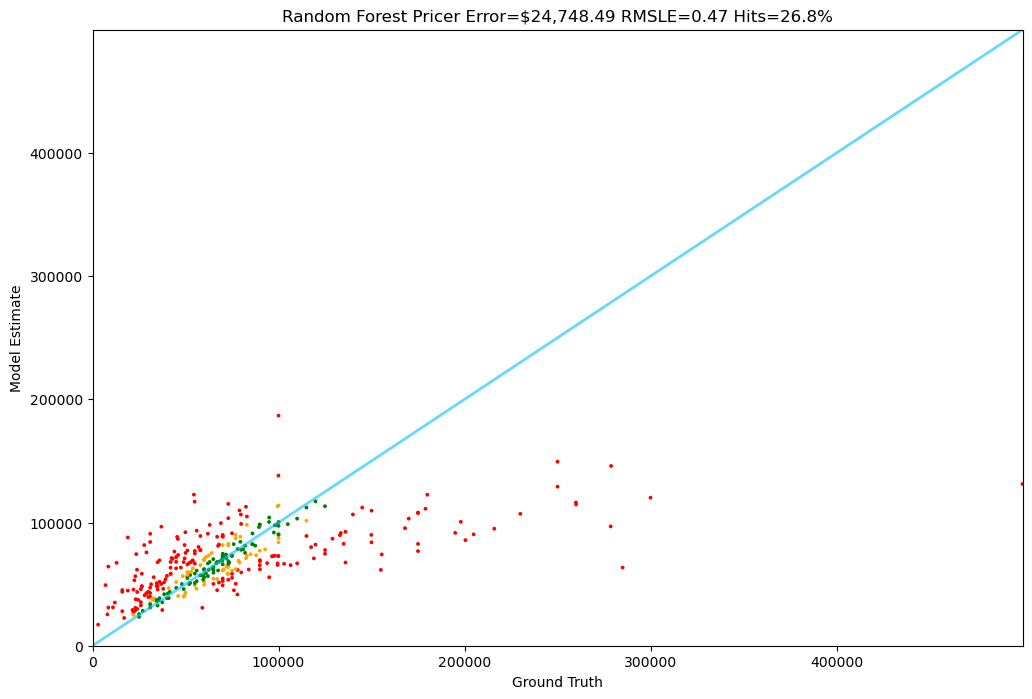

In [11]:
Tester.test(random_forest_pricer, data=rf.test)

In [13]:
# take a look at the most import ngrams
rf.get_feature_importances(model)


Features sorted by importance:
custom: 0.07487981532056177
coyote: 0.045163499834870474
ford mustang: 0.041943283330706425
wilwood: 0.035904433811532896
charger: 0.03003038518946691
shelby: 0.021565547273106542
mustang: 0.020182771134412216
eleanor tribute: 0.019718815661507183
hemi: 0.018298838299371747
fastback: 0.013949475801932605
nascar: 0.01349857398501042
redesigned: 0.011256038024899192
fe: 0.008669410030595787
aware: 0.008586111096895596
restored: 0.0063018388352784225
coupe: 0.006021170900776018
21: 0.005594301397766094
chassis: 0.00448937172679853
1969: 0.004378597767680539
428: 0.003978190250693537


### Run inference on a new example

In [16]:
desc = """Here is a beautiful 1967 Camaro R/S Convertible with major upgrades. This bright yellow glows in the sun with and  the black trim and black custom interior blends very well. The black grill, headlight doors, black out taillights and the black custom convertible top really sets off the yellow. Also, notice several exterior modifications, including a custom rear-end, fully wielded and complete bodywork undercarriage that's undercoated. Detroit speed front clip, x brace connector and quad link makes for a serious suspension system and is mini tubed. It's a first class install all the way, inside and out.

The interior is highly modified and beautiful. The seats, custom dash and gauges are top of the line, The yellow stitching on the seats and custom roll bar is the perfect touch. Stay cool with AC while cruzing  with an amazing 572 ci Chevy high performance engine and keep it cool with an 1000hp aluminum radiator. This big 620 hp with 620 ft lbs. of torque is equipped with an 8 stack Inglese electronic fuel injection, custom handmade intake, 4" headers with 4" stainless steel exhaust. It has a custom gas tank, electric fuel pump, a fully custom electric system. All that motor needs these big Bear brakes front and rear for stopping power. All the hoses and fittings are custom. This is a truly high power, great driver and is just plain beautiful. Not a mark or chip and plenty of pictures of the build and receipts. """

In [18]:
X_new = vectorizer.transform([desc]) 

In [19]:
pred = model.predict(X_new)
print(pred)

[104912.03]


## Traditional ML

In [3]:
# load train and test sets
loader = ItemLoader()
train, test = loader.load_pickle(folder_name=DATASET_FOLDER)

In [6]:
# look at features in a training item
train[0].prompt

"How much does this cost to the nearest dollar?\n\n1970 Ford Bronco\nBeach Ready Bronco 4x4 Restomod by Velocity Restorations The Velocity 1970 Ford Bronco Ranger Package is a head-turning classic that has been reborn and reimagined with fresh coastal vibes and rugged appeal. Balancing retro aesthetics with modern strength, this vintage Ford Bronco restomod blends the best of yesterday and today in every inch of its design. Wrapped in a dazzling two-tone Light Jade over Wimbledon White, this Bronco captures the essence of vintage adventure with the unmistakable charm of the Ranger Package. The exterior's retro stripes and two-tone color scheme are complemented by 33-inch Cooper tires and 17-inch painted steel wheels, giving the Bronco a vintage feel and a sturdy presence on any terrain. The interior continues the theme of elegance and refinement, featuring Velocity's exclusive trim and premium Ranger-upgraded upholstery. Each detail is thoughtfully designed for comfort, blending authen

In [7]:
train[0].features

{'state': 'north carolina',
 'region': 'south',
 'make': 'ford',
 'model': 'bronco',
 'year': 1970,
 'word_count': 482,
 'transmission': 'automatic'}

In [9]:
def clean_doc(doc):
    doc = doc.replace('How much does this cost to the nearest dollar?','')
    doc = doc.split("\n\nPrice is $")[0]
    doc = re.sub(r"\b\w+(?:_\w+){2,}\b", "", doc) # remove category
    doc = doc.strip()
    return doc
    
clean_docs = [clean_doc(item.test_prompt()) for item in train]
prices = [item.price for item in train]


## Get TF-IDF features
1. Split the data into training and test sets.
2. Fit the TF-IDF vectorizer on the training data.
3. Transform both the training and test data using the fitted TF-IDF vectorizer.

In [10]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_df=0.8, # present in no more then 80% of docs
    min_df=5, # present at least 5 docs
    ngram_range=(1,3),
    stop_words= 'english'
)

tfidf_vectors = vectorizer.fit_transform(clean_docs)
feature_names = vectorizer.get_feature_names_out()

dense = tfidf_vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x = 0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x += 1
    all_keywords.append(keywords)
    
print(clean_docs[0])
print(all_keywords[0])

1970 Ford Bronco
Beach Ready Bronco 4x4 Restomod by Velocity Restorations The Velocity 1970 Ford Bronco Ranger Package is a head-turning classic that has been reborn and reimagined with fresh coastal vibes and rugged appeal. Balancing retro aesthetics with modern strength, this vintage Ford Bronco restomod blends the best of yesterday and today in every inch of its design. Wrapped in a dazzling two-tone Light Jade over Wimbledon White, this Bronco captures the essence of vintage adventure with the unmistakable charm of the Ranger Package. The exterior's retro stripes and two-tone color scheme are complemented by 33-inch Cooper tires and 17-inch painted steel wheels, giving the Bronco a vintage feel and a sturdy presence on any terrain. The interior continues the theme of elegance and refinement, featuring Velocity's exclusive trim and premium Ranger-upgraded upholstery. Each detail is thoughtfully designed for comfort, blending authentic style with a level of luxury uncommon in early B

In [11]:
print(tfidf_vectors.shape)
print(len(train))

(1420, 17710)
1420


In [12]:
tfidf_vectors.getrow(0)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 313 stored elements and shape (1, 17710)>

In [13]:
# add tf-idf vector to item objects
for i, item in enumerate(train):
    item.vector = tfidf_vectors.getrow(i)

In [ ]:
train

In [56]:
# import math
# def train_test_split(items: list, test_size: float = 0.2):
#     train_size = 1 - test_size
#     train_split = math.floor(len(items) * train_size)
#     train = items[:train_split]
#     test = items[train_split:]
#     return train, test

# # Split data into training and testing sets
# train, test = train_test_split(items, test_size=0.2)
# X_train = np.array([item.vector.toarray() for item in train])
# X_test = np.array([item.vector.toarray() for item in test])
# y_train = [item.price for item in train]
# y_test = [item.price for item in test]


In [26]:
def reshape_vector(items: np.array):
    # Get the original shape of x_train
    num_samples, _, num_features = items.shape  
    return np.array(items).reshape(num_samples, num_features)

In [52]:
# Create and train the Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=SEED) 
rf_regressor.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_regressor.predict(X_test)

RandomForestRegressor(random_state=42)

In [35]:
def random_forest_pricer(item):
    doc = item.test_prompt()
    doc_vector = item.vector
    return max(0, rf_regressor.predict([doc_vector])[0])

In [57]:
X_test = reshape_vector(X_test)
X_test.shape

(352, 20517)

In [58]:
for idx, item in enumerate(test):
    item.vector = X_test[idx]

1: Guess: $71,113.09 Truth: $69,995.00 Error: $1,118.09 SLE: 0.00 Item: 1969 Chevrolet Camaro
2: Guess: $65,133.88 Truth: $57,995.00 Error: $7,138.88 SLE: 0.01 Item: 1969 Chevrolet Camaro
3: Guess: $95,256.17 Truth: $125,453.00 Error: $30,196.83 SLE: 0.08 Item: 1970 Ford Bronco
4: Guess: $61,609.23 Truth: $112,000.00 Error: $50,390.77 SLE: 0.36 Item: 1967 Chevrolet Camaro
5: Guess: $46,323.46 Truth: $59,000.00 Error: $12,676.54 SLE: 0.06 Item: 1966 Ford Mustang
6: Guess: $64,524.41 Truth: $68,995.00 Error: $4,470.59 SLE: 0.00 Item: 1969 Chevrolet Camaro
7: Guess: $48,437.33 Truth: $36,000.00 Error: $12,437.33 SLE: 0.09 Item: 1966 Ford Mustang
8: Guess: $33,015.17 Truth: $26,900.00 Error: $6,115.17 SLE: 0.04 Item: 1966 Ford Mustang
9: Guess: $53,743.32 Truth: $37,995.00 Error: $15,748.32 SLE: 0.12 Item: 1965 Ford Mustang
10: Guess: $63,438.29 Truth: $77,895.00 Error: $14,456.71 SLE: 0.04 Item: 1974 Ford Bronco
11: Guess: $120,594.27 Truth: $150,000.00 Error: $29,405.73 SLE: 0.05 Item: 1

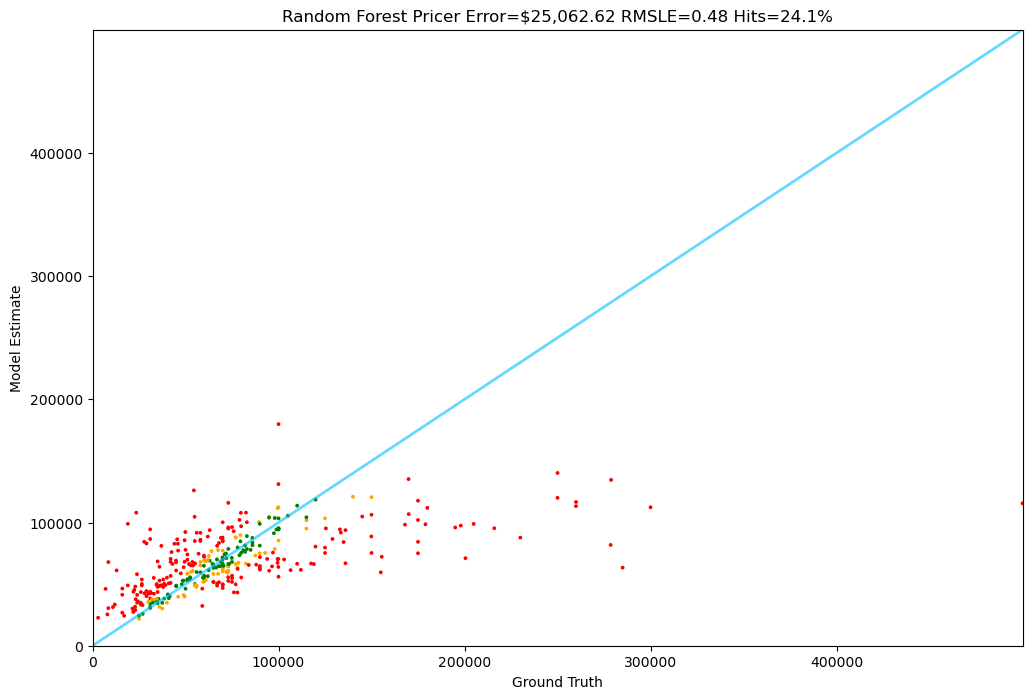

In [59]:
Tester.test(random_forest_pricer, data=test)

In [63]:
feature_importances = rf_regressor.feature_importances_
indices = np.argsort(feature_importances)[::-1]
# Print features in order of importance
print("\nFeatures sorted by importance:")
for i in indices[:100]:
    print(f"{feature_names[i]}: {feature_importances[i]}")


Features sorted by importance:
custom: 0.07752738698466433
ford mustang: 0.04470462079633694
coyote: 0.04436639952961961
wilwood: 0.0364564409790263
charger: 0.026360657148657363
shelby: 0.0191432008735706
eleanor tribute: 0.018191555510054094
mustang: 0.01670029950170325
hemi: 0.01565837763311265
nascar: 0.014636852254544358
fastback: 0.013870307418680497
redesigned: 0.012809912663159805
fe: 0.009419940163216794
coupe: 0.005896817985676409
chassis: 0.00568614578343668
21: 0.005516555838924499
engine numbers: 0.0053466983178482985
1969: 0.005216681827647088
restored: 0.005039741096791044
camaro: 0.004671616976530766
supercharger: 0.0044769472098619804
428: 0.004192110656764584
aware: 0.003904390794748435
cobra: 0.0036423885207588847
427: 0.003612377060471733
mint condition: 0.003583196355921448
car: 0.0035500722488284774
make: 0.0035350587999301995
transmission: 0.0035026503220438442
marti: 0.0034896280865298296
power: 0.0033764297469530487
vintage air: 0.0033608532380736455
completel

In [4]:

# convert training and test sets into pandas df
train_df = utils.list_to_dataframe(train)
test_df = utils.list_to_dataframe(test)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         1420 non-null   object 
 1   region        1376 non-null   object 
 2   make          1420 non-null   object 
 3   model         1420 non-null   object 
 4   year          1420 non-null   int64  
 5   word_count    1420 non-null   int64  
 6   transmission  1420 non-null   object 
 7   price         1420 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 88.9+ KB


In [6]:
train_df.dropna(inplace=True)
train_df.shape

(1376, 8)

In [7]:
np.random.seed(SEED)
# define features and target
feature_cols = ['region', 'make', 'model', 'year', 'transmission', 'word_count']
X_train = train_df[feature_cols]
y_train = train_df['price']
X_test = test_df[feature_cols]
y_test = test_df['price']

# define categorical and numerical cols
categorical_cols = feature_cols[:-1]
numerical_cols = [feature_cols[-1]]

# create pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
]) 

# fit model
pipeline.fit(X_train, y_train)

# access lr model from pipeline
lr = pipeline.named_steps['regressor']
for feature, coef in zip(feature_cols, lr.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {lr.intercept_}")

# Predict the test set and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

region: -6229.2512635075545
make: -3568.126800922999
model: 1064.961738668356
year: 8732.416325760341
transmission: -11069.532208404755
word_count: 13586.058665570517
Intercept: 81942.93674601016
Mean Squared Error: 2413662090.56448
R-squared Score: 0.19144062894448444


In [8]:
# Function to predict price for a new item

def linear_regression_pricer(item):
    features = item.features
    features_df = pd.DataFrame([features])
    features_df = features_df[feature_cols]
    return pipeline.predict(features_df)[0]

1: Guess: $67,163.58 Truth: $102,995.00 Error: $35,831.42 SLE: 0.18 Item: 1969 Chevrolet Camaro
2: Guess: $57,350.31 Truth: $39,995.00 Error: $17,355.31 SLE: 0.13 Item: 1967 Chevrolet Camaro
3: Guess: $67,930.97 Truth: $12,950.00 Error: $54,980.97 SLE: 2.75 Item: 1968 Chevrolet Camaro
4: Guess: $65,412.07 Truth: $115,000.00 Error: $49,587.93 SLE: 0.32 Item: 1968 Chevrolet Camaro SS
5: Guess: $81,971.04 Truth: $125,000.00 Error: $43,028.96 SLE: 0.18 Item: 1967 Ford Mustang
6: Guess: $51,757.09 Truth: $65,000.00 Error: $13,242.91 SLE: 0.05 Item: 1966 Ford Mustang
7: Guess: $58,354.40 Truth: $57,995.00 Error: $359.40 SLE: 0.00 Item: 1967 Chevrolet Camaro
8: Guess: $84,474.60 Truth: $49,500.00 Error: $34,974.60 SLE: 0.29 Item: 1975 Ford Bronco
9: Guess: $58,835.06 Truth: $64,900.00 Error: $6,064.94 SLE: 0.01 Item: 1968 Chevrolet Camaro
10: Guess: $93,044.23 Truth: $36,000.00 Error: $57,044.23 SLE: 0.90 Item: 1967 Ford Bronco
11: Guess: $56,943.70 Truth: $44,950.00 Error: $11,993.70 SLE: 0.

88: Guess: $70,558.68 Truth: $88,000.00 Error: $17,441.32 SLE: 0.05 Item: 1968 Ford Mustang
89: Guess: $50,920.35 Truth: $34,995.00 Error: $15,925.35 SLE: 0.14 Item: 1966 Ford Mustang
90: Guess: $84,086.29 Truth: $55,995.00 Error: $28,091.29 SLE: 0.17 Item: 1969 Ford Mustang
91: Guess: $107,833.31 Truth: $49,500.00 Error: $58,333.31 SLE: 0.61 Item: 1969 Ford Mustang
92: Guess: $48,094.06 Truth: $41,950.00 Error: $6,144.06 SLE: 0.02 Item: 1971 Chevrolet Camaro
93: Guess: $61,223.23 Truth: $62,995.00 Error: $1,771.77 SLE: 0.00 Item: 1967 Chevrolet Camaro
94: Guess: $71,189.77 Truth: $98,900.00 Error: $27,710.23 SLE: 0.11 Item: 1968 Chevrolet Camaro
95: Guess: $67,376.54 Truth: $65,000.00 Error: $2,376.54 SLE: 0.00 Item: 1967 Ford Mustang
96: Guess: $57,591.90 Truth: $59,495.00 Error: $1,903.10 SLE: 0.00 Item: 1968 Chevrolet Camaro
97: Guess: $38,128.13 Truth: $23,995.00 Error: $14,133.13 SLE: 0.21 Item: 1965 Ford Mustang
98: Guess: $71,036.82 Truth: $215,995.00 Error: $144,958.18 SLE: 1.

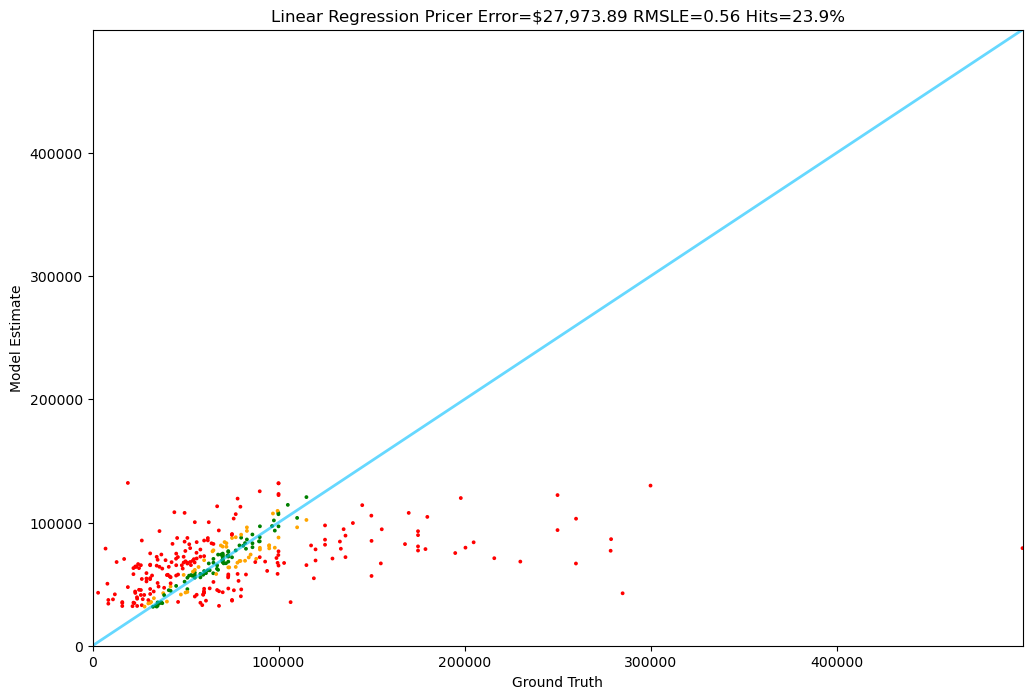

In [9]:
# test it

Tester.test(linear_regression_pricer, data=test)

In [15]:
# try models that just use the text within the documents rather than engineered features

prices = np.array([float(item.price) for item in train if item.features.get('region')])
documents = [item.test_prompt() for item in train if item.features.get('region')]

In [16]:
# Use the CountVectorizer for a Bag of Words model

np.random.seed(SEED)
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)
regressor = LinearRegression()
regressor.fit(X, prices)

LinearRegression()

In [17]:
def bow_lr_pricer(item):
    x = vectorizer.transform([item.test_prompt()])
    return max(regressor.predict(x)[0], 0)

1: Guess: $72,702.70 Truth: $102,995.00 Error: $30,292.30 SLE: 0.12 Item: 1969 Chevrolet Camaro
2: Guess: $0.00 Truth: $39,995.00 Error: $39,995.00 SLE: 112.29 Item: 1967 Chevrolet Camaro
3: Guess: $25,238.86 Truth: $12,950.00 Error: $12,288.86 SLE: 0.45 Item: 1968 Chevrolet Camaro
4: Guess: $143,848.48 Truth: $115,000.00 Error: $28,848.48 SLE: 0.05 Item: 1968 Chevrolet Camaro SS
5: Guess: $0.00 Truth: $125,000.00 Error: $125,000.00 SLE: 137.74 Item: 1967 Ford Mustang
6: Guess: $0.00 Truth: $65,000.00 Error: $65,000.00 SLE: 122.81 Item: 1966 Ford Mustang
7: Guess: $100,744.18 Truth: $57,995.00 Error: $42,749.18 SLE: 0.30 Item: 1967 Chevrolet Camaro
8: Guess: $121,088.91 Truth: $49,500.00 Error: $71,588.91 SLE: 0.80 Item: 1975 Ford Bronco
9: Guess: $55,465.20 Truth: $64,900.00 Error: $9,434.80 SLE: 0.02 Item: 1968 Chevrolet Camaro
10: Guess: $104,914.69 Truth: $36,000.00 Error: $68,914.69 SLE: 1.14 Item: 1967 Ford Bronco
11: Guess: $0.00 Truth: $44,950.00 Error: $44,950.00 SLE: 114.78 I

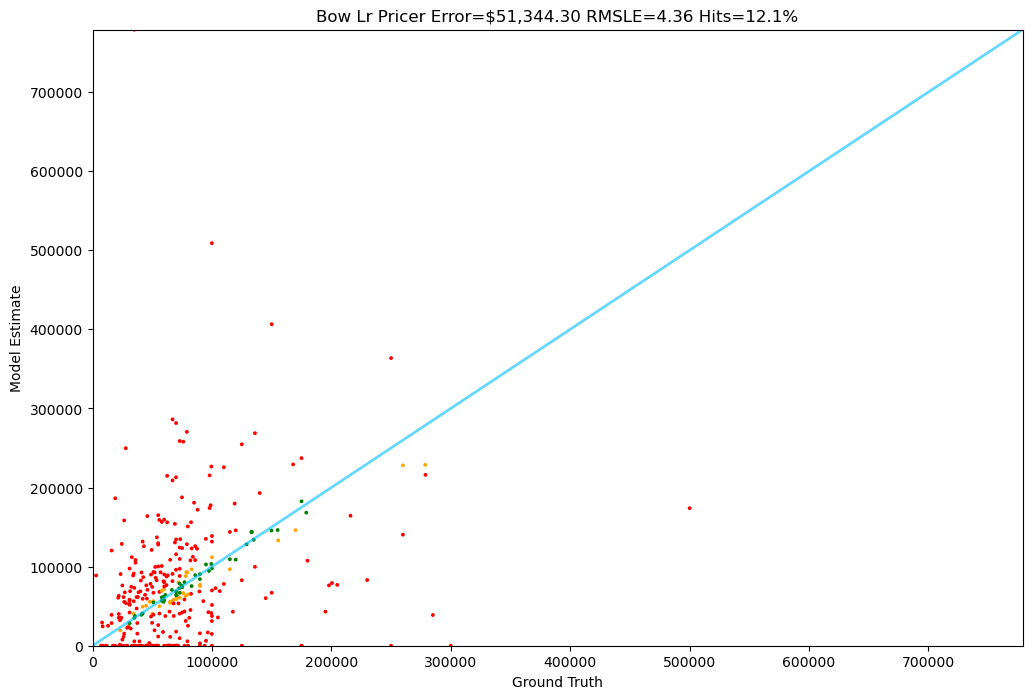

In [18]:
# test it

Tester.test(bow_lr_pricer, data=test)

In [19]:
# word2vec model, implemented in gensim NLP library

np.random.seed(SEED)

# Preprocess the documents
processed_docs = [simple_preprocess(doc) for doc in documents]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=processed_docs, vector_size=400, window=5, min_count=1, workers=8)

In [20]:
# This step of averaging vectors across the document is a weakness in this approach

def document_vector(doc):
    doc_words = simple_preprocess(doc)
    word_vectors = [w2v_model.wv[word] for word in doc_words if word in w2v_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(w2v_model.vector_size)

# Create feature matrix
X_w2v = np.array([document_vector(doc) for doc in documents])

In [21]:
# Run Linear Regression on word2vec

word2vec_lr_regressor = LinearRegression()
word2vec_lr_regressor.fit(X_w2v, prices)

LinearRegression()

In [22]:
def word2vec_lr_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, word2vec_lr_regressor.predict([doc_vector])[0])

1: Guess: $82,704.83 Truth: $102,995.00 Error: $20,290.17 SLE: 0.05 Item: 1969 Chevrolet Camaro
2: Guess: $49,524.58 Truth: $39,995.00 Error: $9,529.58 SLE: 0.05 Item: 1967 Chevrolet Camaro
3: Guess: $111,397.70 Truth: $12,950.00 Error: $98,447.70 SLE: 4.63 Item: 1968 Chevrolet Camaro
4: Guess: $138,927.33 Truth: $115,000.00 Error: $23,927.33 SLE: 0.04 Item: 1968 Chevrolet Camaro SS
5: Guess: $98,286.08 Truth: $125,000.00 Error: $26,713.92 SLE: 0.06 Item: 1967 Ford Mustang
6: Guess: $51,438.83 Truth: $65,000.00 Error: $13,561.17 SLE: 0.05 Item: 1966 Ford Mustang
7: Guess: $90,628.83 Truth: $57,995.00 Error: $32,633.83 SLE: 0.20 Item: 1967 Chevrolet Camaro
8: Guess: $54,339.83 Truth: $49,500.00 Error: $4,839.83 SLE: 0.01 Item: 1975 Ford Bronco
9: Guess: $52,940.08 Truth: $64,900.00 Error: $11,959.92 SLE: 0.04 Item: 1968 Chevrolet Camaro
10: Guess: $15,403.70 Truth: $36,000.00 Error: $20,596.30 SLE: 0.72 Item: 1967 Ford Bronco
11: Guess: $39,195.58 Truth: $44,950.00 Error: $5,754.42 SLE:

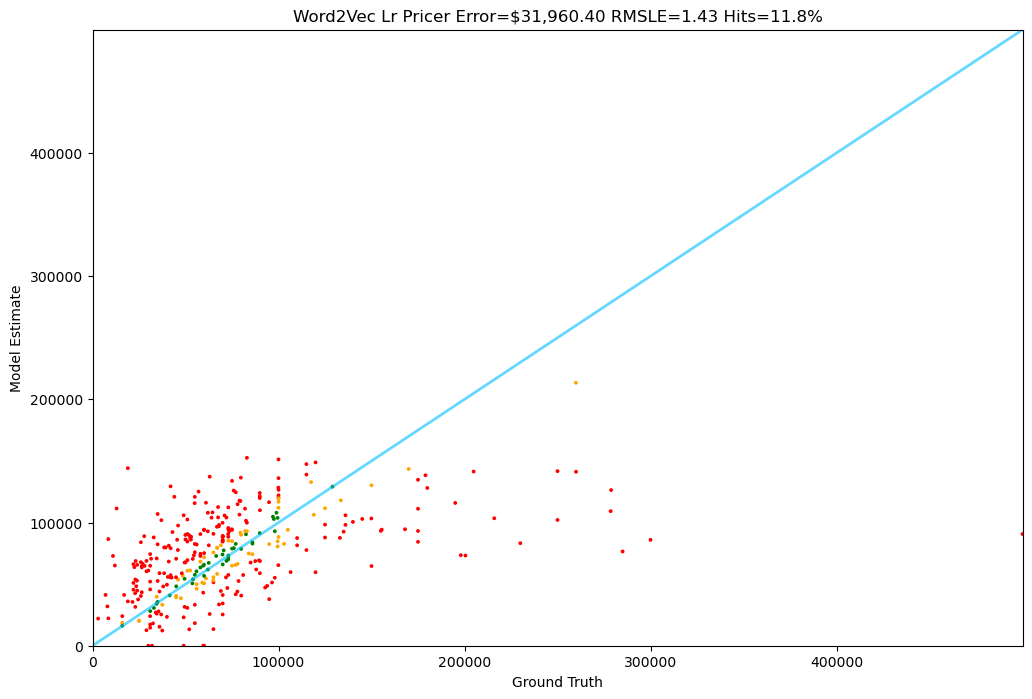

In [23]:
Tester.test(word2vec_lr_pricer, data=test)

In [24]:
# And the powerful Random Forest regression

rf_model = RandomForestRegressor(n_estimators=100, random_state=SEED, n_jobs=8)
rf_model.fit(X_w2v, prices)

RandomForestRegressor(n_jobs=8, random_state=42)

In [25]:
def random_forest_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, rf_model.predict([doc_vector])[0])

1: Guess: $54,906.73 Truth: $102,995.00 Error: $48,088.27 SLE: 0.40 Item: 1969 Chevrolet Camaro
2: Guess: $73,667.86 Truth: $39,995.00 Error: $33,672.86 SLE: 0.37 Item: 1967 Chevrolet Camaro
3: Guess: $85,825.92 Truth: $12,950.00 Error: $72,875.92 SLE: 3.58 Item: 1968 Chevrolet Camaro
4: Guess: $83,824.22 Truth: $115,000.00 Error: $31,175.78 SLE: 0.10 Item: 1968 Chevrolet Camaro SS
5: Guess: $105,029.34 Truth: $125,000.00 Error: $19,970.66 SLE: 0.03 Item: 1967 Ford Mustang
6: Guess: $45,378.82 Truth: $65,000.00 Error: $19,621.18 SLE: 0.13 Item: 1966 Ford Mustang
7: Guess: $83,675.88 Truth: $57,995.00 Error: $25,680.88 SLE: 0.13 Item: 1967 Chevrolet Camaro
8: Guess: $80,977.33 Truth: $49,500.00 Error: $31,477.33 SLE: 0.24 Item: 1975 Ford Bronco
9: Guess: $90,486.96 Truth: $64,900.00 Error: $25,586.96 SLE: 0.11 Item: 1968 Chevrolet Camaro
10: Guess: $65,717.43 Truth: $36,000.00 Error: $29,717.43 SLE: 0.36 Item: 1967 Ford Bronco
11: Guess: $66,167.68 Truth: $44,950.00 Error: $21,217.68 SL

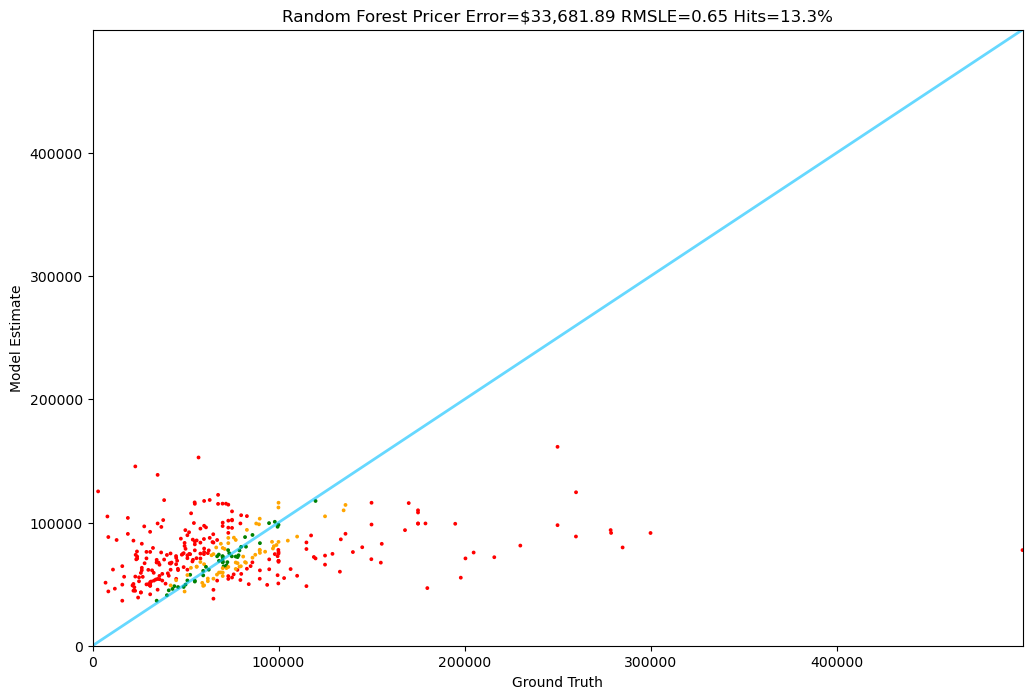

In [26]:
Tester.test(random_forest_pricer, data=test)

In [38]:
feature_cols = ['region', 'make', 'model', 'year', 'transmission']

# Define transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Convert X_w2v into a DataFrame
df_w2v = pd.DataFrame(X_w2v)
X_w2v_column_names = [f'w2v_{i}' for i in range(df_w2v.shape[1])]
df_w2v.columns = X_w2v_column_names

# reset indices
X_train = X_train.reset_index(drop=True)
df_w2v = df_w2v.reset_index(drop=True)

# Combine feature columns
combined_df = pd.concat([X_train[feature_cols], df_w2v], axis=1)

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, feature_cols), 
        ('w2v', 'passthrough', X_w2v_column_names)  
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=SEED)) 
])

# Fit the pipeline
pipeline.fit(combined_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'make', 'model',
                                                   'year', 'transmission']),
                                                 ('w2v', 'passthrough',
                                                  ['w2v_0', 'w2v_1', 'w2v_2',
                                                   'w2v_3', 'w2v_4', 'w2v_5',
                                                   'w2v_6', 'w2v_7', 'w2v_8',
                                                   'w2v_9', 'w2v_10', 'w2v_11',
                                                   'w2v_12', 'w2v_13', 'w2v_14',
                                                   'w2v_15', 'w2v_16', 'w2v_17',
                                                   'w2v_18', 'w2v_19', 'w2v_20',
                                                   'w2v_21', 'w2v_22', 'w2v_23',
                                                   'w2v_24', 'w2v_25', 'w2v_26',
                                                   'w2v_27', 'w2v_28', 'w2v_29', ...])])),
                ('rf', RandomForestRegressor(random_state=42))])

In [67]:
def random_forest_exog_pricer(item):
    # Extract exogenous (categorical) variables
    item_features = {'region':item.features.get('region'), 
                     'make':item.features.get('make'), 
                     'model': item.features.get('model'), 
                     'year': item.features.get('year'), 
                     'transmission': item.features.get('transmission')}
    
    item_features_df = pd.DataFrame([item_features])
   
    
    # Convert text into a document vector
    doc = item.test_prompt()
    doc_vector = document_vector(doc)  # Must match training shape
    
    # Ensure doc_vector is a NumPy array and reshape
    doc_vector = np.array(doc_vector).reshape(1, -1)
    
    # Wrap the vector in a df with appropriate col names
    assert doc_vector.shape[1] == len(X_w2v_column_names), "Mismatch in Word2Vec feature dimensions"
    doc_vector_df = pd.DataFrame(doc_vector, columns=X_w2v_column_names)
    
    # reset index before concatenating
    item_features_df = item_features_df.reset_index(drop=True)
    doc_vector_df = doc_vector_df.reset_index(drop=True)
     
    # Combine categorical features and document vector into a single df
    combined_features_df = pd.concat([item_features_df, doc_vector_df], axis=1)
    combined_features_df = combined_features_df[combined_df.columns]

    # Apply the same processor from training
    processed_features = preprocessor.transform(combined_features_df)

    # Predict price
    return max(0, pipeline.predict(processed_features)[0])

In [58]:
d = documents[0]
v = document_vector(d)
r = np.array(v).reshape(1,-1)
r.shape

(1, 400)

In [62]:
train[0].features.get('region')

'south'

In [68]:
Tester.test(random_forest_exog_pricer, data=test)

ValueError: X has 426 features, but ColumnTransformer is expecting 405 features as input.

In [39]:
combined_df.head()

,region,make,model,year,transmission,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,...,w2v_390,w2v_391,w2v_392,w2v_393,w2v_394,w2v_395,w2v_396,w2v_397,w2v_398,w2v_399
0,south,ford,bronco,1970,automatic,0.006151,-0.106469,-0.028469,0.046160,-0.026135,...,0.057620,-0.116291,-0.137585,0.023407,0.085935,-0.008857,-0.099200,-0.103774,-0.064112,0.089345
1,south,chevrolet,camaro,1968,automatic,-0.028460,-0.157083,-0.019749,0.024929,-0.038762,...,0.086272,-0.147413,-0.109468,0.011229,0.094625,0.113615,-0.144151,-0.117922,-0.087147,0.164955
2,south,dodge,charger,1970,automatic,0.038565,-0.112300,-0.002422,0.173524,-0.050599,...,0.107484,-0.123291,-0.217607,0.058601,0.056434,-0.127056,-0.133051,-0.116762,-0.020019,0.175666
3,midwest,chevrolet,camaro,1968,automatic,-0.008327,-0.074615,-0.001149,0.151202,0.009407,...,0.135822,-0.188175,-0.169809,0.047983,0.044383,-0.052589,-0.116853,-0.060836,-0.072610,0.106544
4,midwest,ford,mustang,1965,automatic,0.000513,-0.075595,-0.004768,0.293237,0.023760,...,0.126748,-0.209627,-0.262299,0.024709,0.049153,-0.172443,-0.137233,-0.130612,-0.038000,0.172895


## Frontier Models

In [4]:
# open ai gpt-4o-mini
def messages_for(item):
    system_message = "You estimate prices of items. Reply only with the price, no explanation"
    user_prompt = item.test_prompt().replace(" to the nearest dollar","").replace("\n\nPrice is $","")
    return [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_prompt},
        {"role": "assistant", "content": "Price is $"}
    ]

In [8]:
# # utility function to extract price from a string

# def get_price(s):
#     s = s.replace('$','').replace(',','')
#     match = re.search(r"[-+]?\d*\.\d+|\d+", s)
#     return float(match.group()) if match else 0

# get_price('Price is $125,000.45 blah blah')

125000.45

### 4o Mini

In [5]:
openai.api_key = OPENAI_API_KEY

def gpt_4o_mini(item):
    response = openai.chat.completions.create(
        model="gpt-4o-mini", 
        messages=messages_for(item),
        seed=SEED,
        max_tokens=5
    )
    reply = response.choices[0].message.content
    return utils.get_price(reply)

1: Guess: $75,000.00 Truth: $102,995.00 Error: $27,995.00 SLE: 0.10 Item: 1969 Chevrolet Camaro
2: Guess: $38,000.00 Truth: $39,995.00 Error: $1,995.00 SLE: 0.00 Item: 1967 Chevrolet Camaro
3: Guess: $12,000.00 Truth: $12,950.00 Error: $950.00 SLE: 0.01 Item: 1968 Chevrolet Camaro
4: Guess: $75,000.00 Truth: $115,000.00 Error: $40,000.00 SLE: 0.18 Item: 1968 Chevrolet Camaro SS
5: Guess: $200,000.00 Truth: $125,000.00 Error: $75,000.00 SLE: 0.22 Item: 1967 Ford Mustang
6: Guess: $60,000.00 Truth: $65,000.00 Error: $5,000.00 SLE: 0.01 Item: 1966 Ford Mustang
7: Guess: $45,000.00 Truth: $57,995.00 Error: $12,995.00 SLE: 0.06 Item: 1967 Chevrolet Camaro
8: Guess: $49,500.00 Truth: $49,500.00 Error: $0.00 SLE: 0.00 Item: 1975 Ford Bronco
9: Guess: $45,000.00 Truth: $64,900.00 Error: $19,900.00 SLE: 0.13 Item: 1968 Chevrolet Camaro
10: Guess: $36,000.00 Truth: $36,000.00 Error: $0.00 SLE: 0.00 Item: 1967 Ford Bronco
11: Guess: $35,000.00 Truth: $44,950.00 Error: $9,950.00 SLE: 0.06 Item: 19

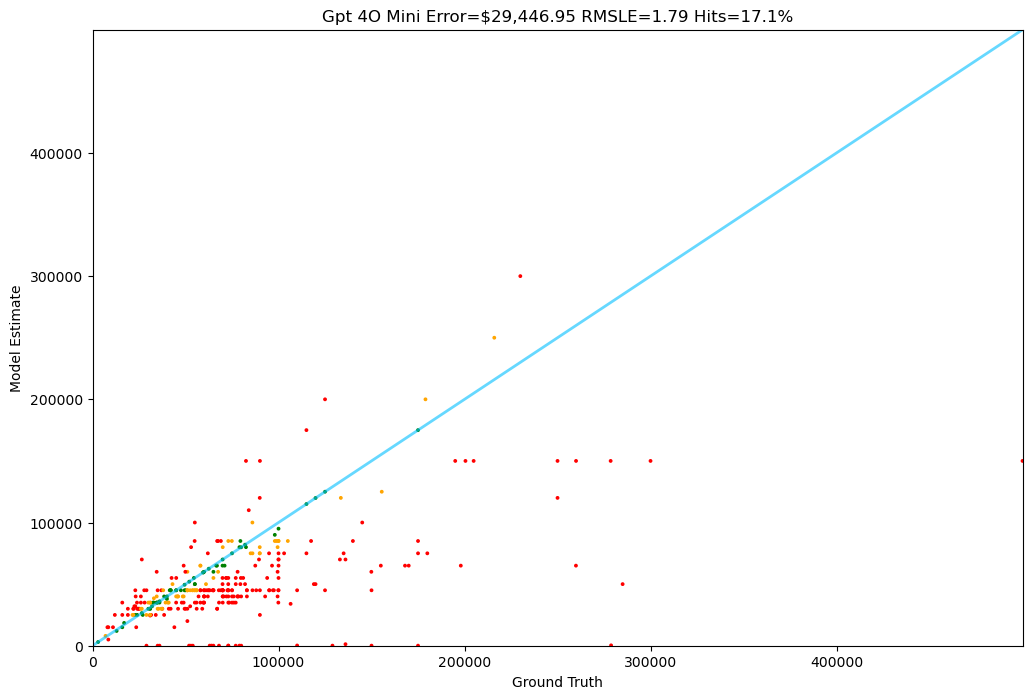

In [7]:
Tester.test(gpt_4o_mini, test)

### GPT 4o Frontier

In [9]:

def gpt_4o_frontier(item):
    response = openai.chat.completions.create(
        model="gpt-4o-2024-08-06", 
        messages=messages_for(item),
        seed=SEED,
        max_tokens=5
    )
    reply = response.choices[0].message.content
    return utils.get_price(reply)

1: Guess: $160,000.00 Truth: $102,995.00 Error: $57,005.00 SLE: 0.19 Item: 1969 Chevrolet Camaro
2: Guess: $60,000.00 Truth: $39,995.00 Error: $20,005.00 SLE: 0.16 Item: 1967 Chevrolet Camaro
3: Guess: $12,000.00 Truth: $12,950.00 Error: $950.00 SLE: 0.01 Item: 1968 Chevrolet Camaro
4: Guess: $150,000.00 Truth: $115,000.00 Error: $35,000.00 SLE: 0.07 Item: 1968 Chevrolet Camaro SS
5: Guess: $139,000.00 Truth: $125,000.00 Error: $14,000.00 SLE: 0.01 Item: 1967 Ford Mustang
6: Guess: $85,000.00 Truth: $65,000.00 Error: $20,000.00 SLE: 0.07 Item: 1966 Ford Mustang
7: Guess: $70,000.00 Truth: $57,995.00 Error: $12,005.00 SLE: 0.04 Item: 1967 Chevrolet Camaro
8: Guess: $49,500.00 Truth: $49,500.00 Error: $0.00 SLE: 0.00 Item: 1975 Ford Bronco
9: Guess: $139,000.00 Truth: $64,900.00 Error: $74,100.00 SLE: 0.58 Item: 1968 Chevrolet Camaro
10: Guess: $36,000.00 Truth: $36,000.00 Error: $0.00 SLE: 0.00 Item: 1967 Ford Bronco
11: Guess: $65,000.00 Truth: $44,950.00 Error: $20,050.00 SLE: 0.14 It

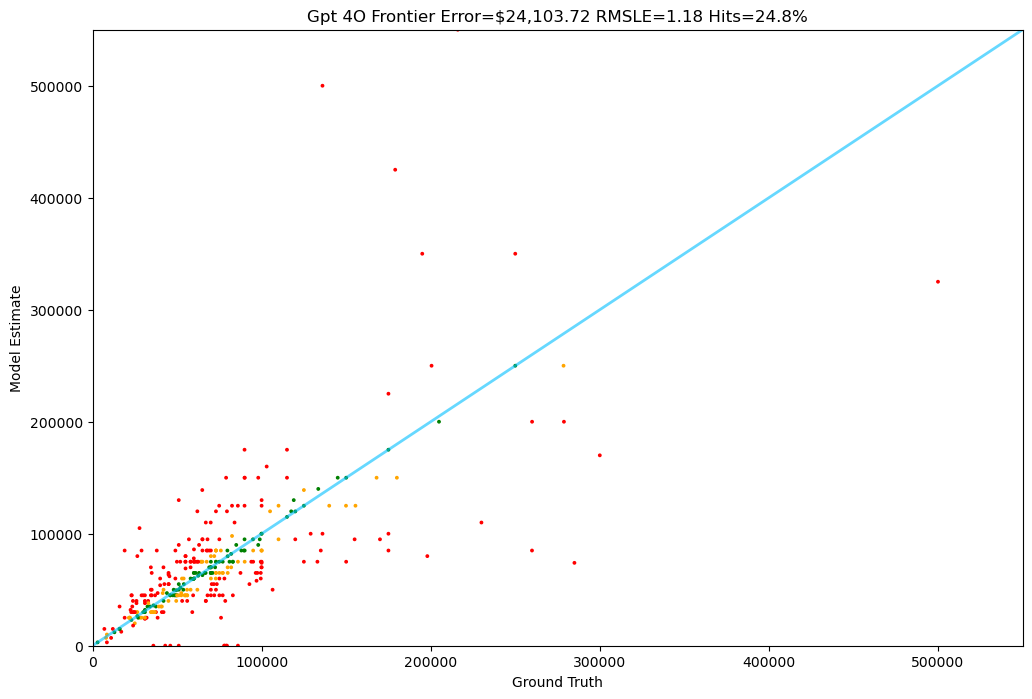

In [10]:
Tester.test(gpt_4o_frontier, test)

In [5]:
claude = anthropic.Anthropic(api_key=ANTHROPIC_API_KEY)

def claude_3_point_5_sonnet(item):
    messages = messages_for(item)
    system_message = messages[0]['content']
    messages = messages[1:]
    response = claude.messages.create(
        model="claude-3-5-sonnet-20240620",
        max_tokens=5,
        system=system_message,
        messages=messages
    )
    reply = response.content[0].text
    return get_price(reply)

1: Guess: $130,000.00 Truth: $102,995.00 Error: $27,005.00 SLE: 0.05 Item: 1969 Chevrolet Camaro
2: Guess: $45,000.00 Truth: $39,995.00 Error: $5,005.00 SLE: 0.01 Item: 1967 Chevrolet Camaro
3: Guess: $12,000.00 Truth: $12,950.00 Error: $950.00 SLE: 0.01 Item: 1968 Chevrolet Camaro
4: Guess: $125,000.00 Truth: $115,000.00 Error: $10,000.00 SLE: 0.01 Item: 1968 Chevrolet Camaro SS
5: Guess: $98,500.00 Truth: $125,000.00 Error: $26,500.00 SLE: 0.06 Item: 1967 Ford Mustang
6: Guess: $74,500.00 Truth: $65,000.00 Error: $9,500.00 SLE: 0.02 Item: 1966 Ford Mustang
7: Guess: $65,000.00 Truth: $57,995.00 Error: $7,005.00 SLE: 0.01 Item: 1967 Chevrolet Camaro
8: Guess: $49,500.00 Truth: $49,500.00 Error: $0.00 SLE: 0.00 Item: 1975 Ford Bronco
9: Guess: $75,000.00 Truth: $64,900.00 Error: $10,100.00 SLE: 0.02 Item: 1968 Chevrolet Camaro
10: Guess: $36,000.00 Truth: $36,000.00 Error: $0.00 SLE: 0.00 Item: 1967 Ford Bronco
11: Guess: $59,500.00 Truth: $44,950.00 Error: $14,550.00 SLE: 0.08 Item: 1

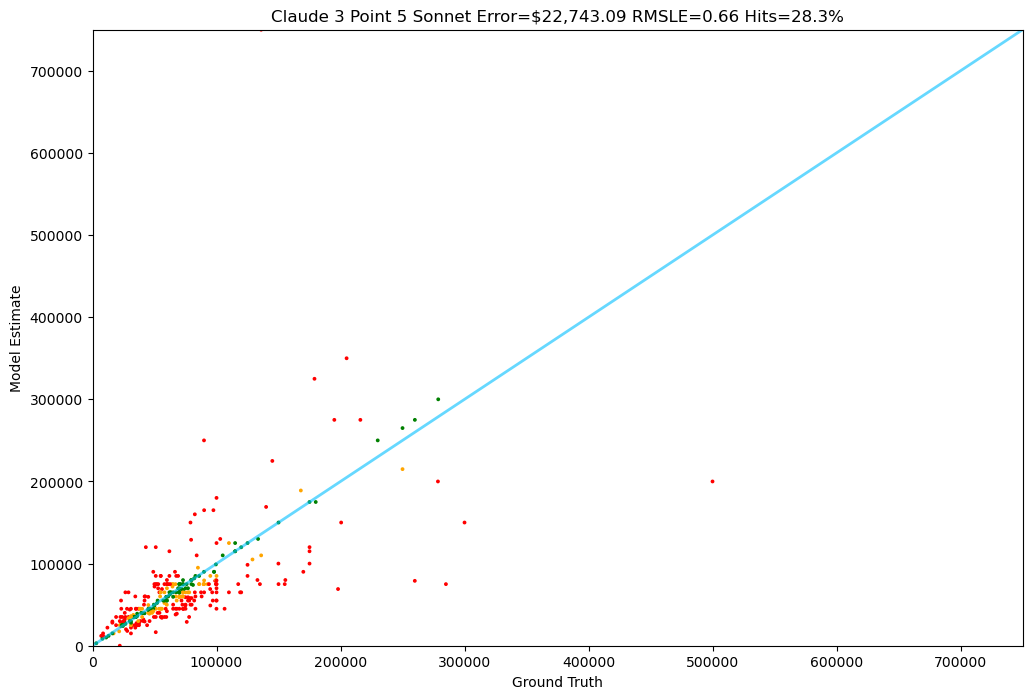

In [6]:
Tester.test(claude_3_point_5_sonnet, test)